# Unsupervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

#### A. Data Import: Import the dataset into a statistical software tool such as Python or R.

In [49]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from IPython.display import display, Markdown

file_path = "Wholesale_Data.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the DataFrame
display(df)

# Display the footnotes to help understand the data further
footnotes = """
| Column | Description |
| --- | --- |
| **Channel** | Horeca (Hotel/Restaurant/Cafe) or Retail channel (Nominal) |
| **Region** | Regions - Lisbon, Oporto, or Other (Nominal) |
| **Fresh** | Annual spending (m.u.) on fresh products (Continuous) |
| **Milk** | Annual spending (m.u.) on milk products (Continuous) |
| **Grocery** | Annual spending (m.u.) on grocery products (Continuous) |
| **Frozen** | Annual spending (m.u.) on frozen products (Continuous) |
| **Detergents_Paper** | Annual spending (m.u.) on detergents and paper products (Continuous) |
| **Delicassen** | Annual spending (m.u.) on delicatessen products (Continuous) |
"""
display(Markdown(footnotes))

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125



| Column | Description |
| --- | --- |
| **Channel** | Horeca (Hotel/Restaurant/Cafe) or Retail channel (Nominal) |
| **Region** | Regions - Lisbon, Oporto, or Other (Nominal) |
| **Fresh** | Annual spending (m.u.) on fresh products (Continuous) |
| **Milk** | Annual spending (m.u.) on milk products (Continuous) |
| **Grocery** | Annual spending (m.u.) on grocery products (Continuous) |
| **Frozen** | Annual spending (m.u.) on frozen products (Continuous) |
| **Detergents_Paper** | Annual spending (m.u.) on detergents and paper products (Continuous) |
| **Delicassen** | Annual spending (m.u.) on delicatessen products (Continuous) |


#### B. Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.

In [9]:
# Check for missing values 
missing_values = df.isnull().sum()
print(missing_values)

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [16]:
for column in df.columns:
    values = df[column].unique()
    print(f"Column {column} ({len(values)} unique values):")
    # Printing the unique values as a list
    values_str = ', '.join(str(value) for value in values)
    print(values_str)
    print("\n")

Column Channel (2 unique values):
2, 1


Column Region (3 unique values):
3, 1, 2


Column Fresh (433 unique values):
12669, 7057, 6353, 13265, 22615, 9413, 12126, 7579, 5963, 6006, 3366, 13146, 31714, 21217, 24653, 10253, 1020, 5876, 18601, 7780, 17546, 5567, 31276, 26373, 22647, 16165, 9898, 14276, 4113, 43088, 18815, 2612, 21632, 29729, 1502, 688, 29955, 15168, 4591, 56159, 24025, 19176, 10850, 630, 9670, 5181, 3103, 44466, 11519, 4967, 6269, 3347, 40721, 491, 27329, 5264, 4098, 5417, 13779, 6137, 8590, 35942, 7823, 9396, 4760, 85, 9, 19913, 2446, 8352, 16705, 18291, 4420, 19899, 8190, 20398, 717, 12205, 10766, 1640, 7005, 219, 10362, 20874, 11867, 16117, 22925, 43265, 7864, 24904, 11405, 12754, 9198, 11314, 5626, 3, 23, 403, 503, 9658, 11594, 1420, 2932, 56082, 14100, 15587, 1454, 8797, 1531, 1406, 11818, 12579, 19046, 14438, 18044, 11134, 11173, 6990, 20049, 8258, 17160, 4020, 12212, 11170, 36050, 76237, 19219, 21465, 140, 42312, 7149, 2101, 14903, 9434, 7388, 6300, 4625, 3087, 13

**By checking for null values first, it seem like there are no missing numbers in the dataset. However that does not totally mean we are clear of any missing or incorrect data. By checking the unique values of each columns, we can see that there were no negative values that might have been a sign of an incorrect data. "Channel" and "Region" columns both contained values of [2,1] and [3,1,2] respectively. These values seem reasonable as when we look at our description of our df in step 1 of part A, we can see that these values are identifiers for different channels or different geographical regions. Furthermore, "Fresh","Milk","Detergents_Paper", and "Delicassen" values also look normal as it represents annual spending in monetary units (m.u) and we can expect wide range of spending values and as well more spending in staple categories like "Fresh", "Milk" and "Groceries".**

#### C. Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.

In [48]:
# Data Description
summary_stats = df.describe()

# Round the values to two decimal places before transposing
summary_stats_rounded = summary_stats.round(3)

# Transpose the rounded summary statistics DataFrame
summary_stats_transposed_rounded = summary_stats_rounded.transpose()

# Print Statistics
print("Summary Statistics:")
print(summary_stats_transposed_rounded)

Summary Statistics:
                  count       mean        std   min      25%     50%  \
Channel           440.0      1.323      0.468   1.0     1.00     1.0   
Region            440.0      2.543      0.774   1.0     2.00     3.0   
Fresh             440.0  12000.298  12647.329   3.0  3127.75  8504.0   
Milk              440.0   5796.266   7380.377  55.0  1533.00  3627.0   
Grocery           440.0   7951.277   9503.163   3.0  2153.00  4755.5   
Frozen            440.0   3071.932   4854.673  25.0   742.25  1526.0   
Detergents_Paper  440.0   2881.493   4767.854   3.0   256.75   816.5   
Delicassen        440.0   1524.870   2820.106   3.0   408.25   965.5   

                       75%       max  
Channel               2.00       2.0  
Region                3.00       3.0  
Fresh             16933.75  112151.0  
Milk               7190.25   73498.0  
Grocery           10655.75   92780.0  
Frozen             3554.25   60869.0  
Detergents_Paper   3922.00   40827.0  
Delicassen         

***Data Description Analysis:***

**Count:** All variables have a count of 440 which indicates that there are no missing values. 

**Mean and Standard Deviation:** This gives us more information about the central tendency and the spread of the data. By observing our statistics, we can see that the scales of the variables varies significantly. Meaning that they are not on the same scale. 

**Minimum and Maximum:** The maximum vales for each variable are considerably larger than their means. This tells us that there are possible outliers in our dataset.

**25th, 50th and 75th Percentiles:** This helps us undertand the distrubution of our data and helps us see any skewedness. Looking at the 75th percentile we can see that there might be outliers in the upper range of the data because of the difference between the 75th percentile and the maximum values.

#### D. Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. 

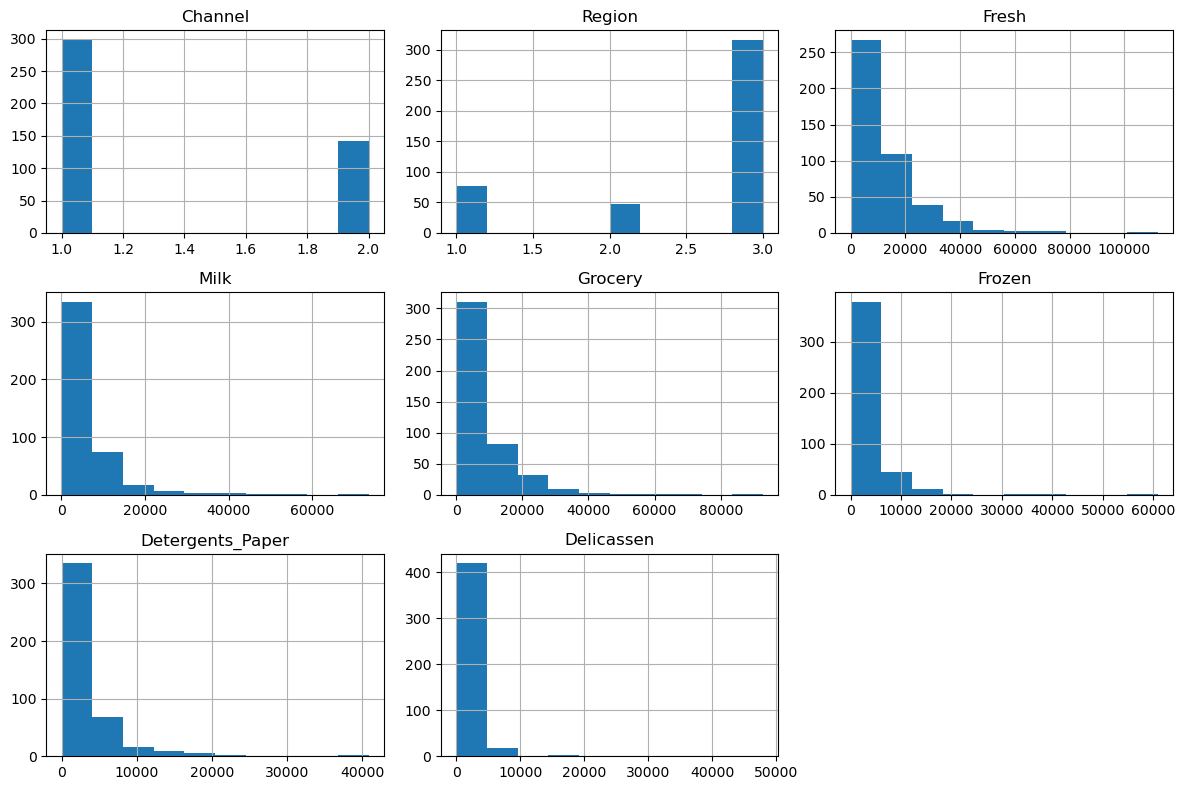

In [51]:
# Histograms
df.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

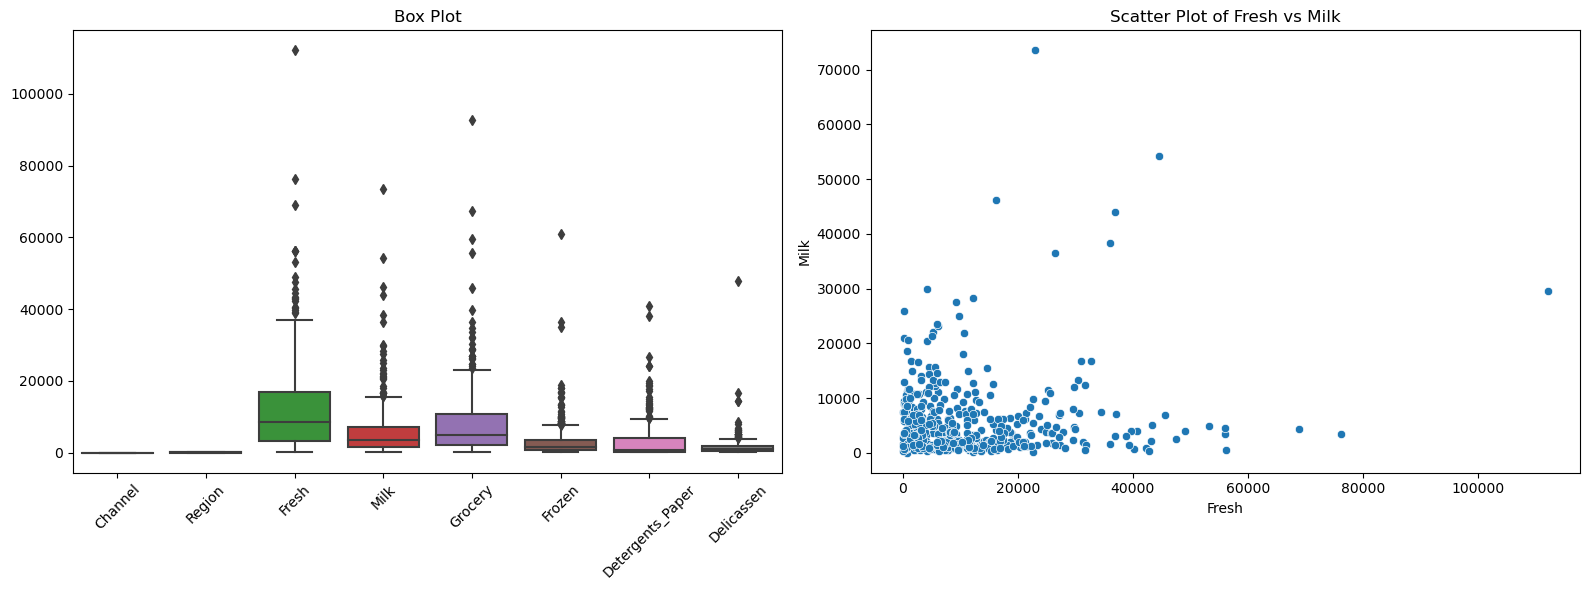

In [75]:
# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Box plot
sns.boxplot(data=df, ax=axes[0])
axes[0].set_title('Box Plot')
axes[0].tick_params(axis='x', rotation=45)

# Scatter plot
sns.scatterplot(data=df, x='Fresh', y='Milk', ax=axes[1])
axes[1].set_title('Scatter Plot of Fresh vs Milk')

# Adjust layout to fit tightly
plt.tight_layout()

# Show the plots
plt.show()

#### E. Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.

In [79]:
# Outlier Detection using IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Detect outliers
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

# Print the number of outliers for each column
print("Number of outliers:")
print(outliers)

Number of outliers:
Channel              0
Region               0
Fresh               20
Milk                28
Grocery             24
Frozen              43
Detergents_Paper    30
Delicassen          27
dtype: int64


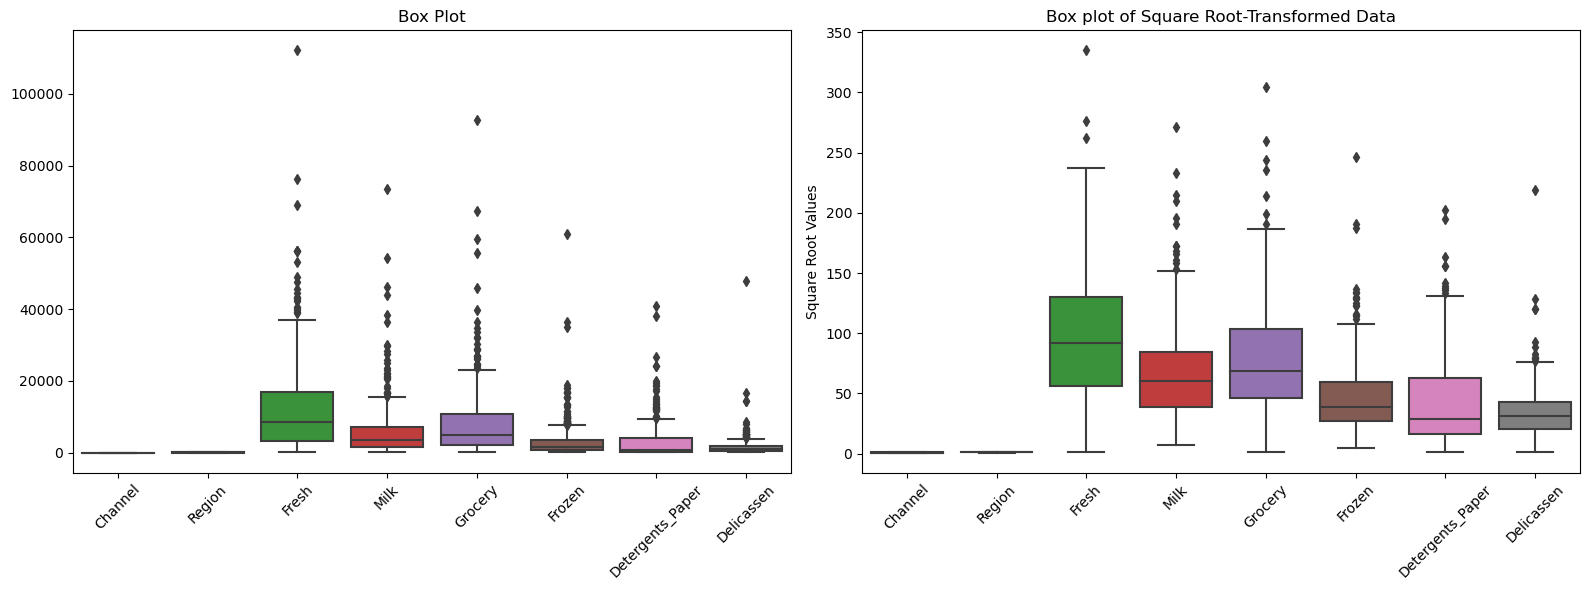

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Square root transformation
df_sqrt = np.sqrt(df)

# Create a box plot of the square root-transformed data
sns.boxplot(data=df_sqrt, ax=axes[1])  # Plot on the second subplot
axes[1].set_title('Box plot of Square Root-Transformed Data')
axes[1].set_ylabel('Square Root Values')
axes[1].tick_params(axis='x', rotation=45)

# Box plot
sns.boxplot(data=df, ax=axes[0])
axes[0].set_title('Box Plot')
axes[0].tick_params(axis='x', rotation=45)

# Adjust layout to fit tightly
plt.tight_layout()

# Show the plots
plt.show()

**Handled outliers by transforming the data to reduce the impact of the outliers. Used a square root transformation**

#### F. Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not.

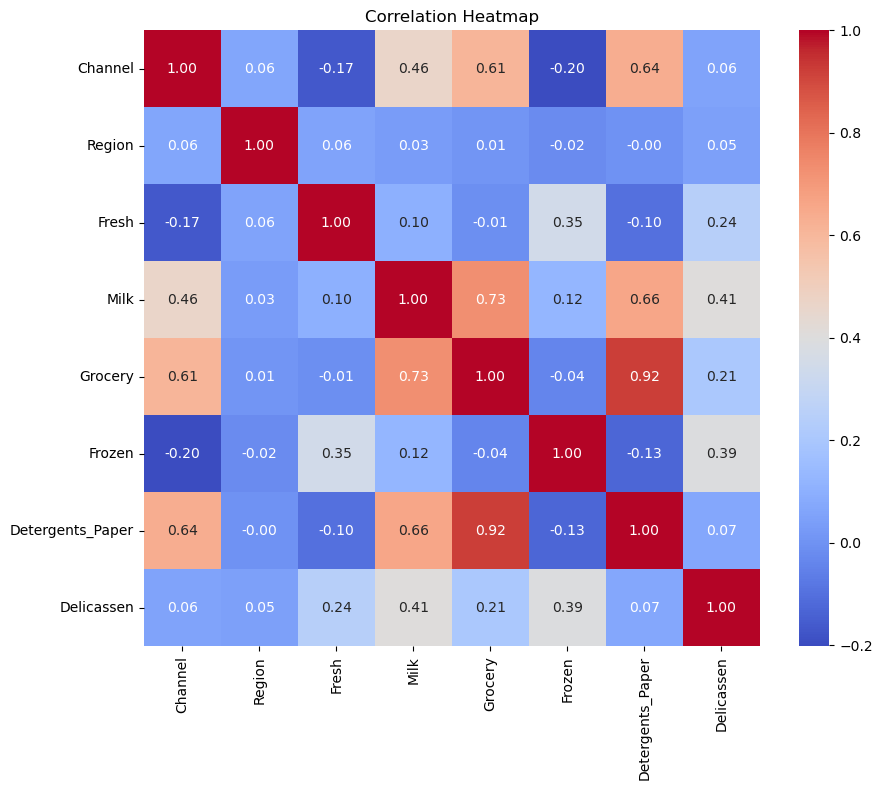

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap')
plt.show()

***Correlation Analysis:***

**Channel:** 
- Shows a decently strong positive correlation with Grocery (0.61) and Detergents_paper (0.64). Meaning that as one variable increases, the other tends to increase slightly. 

**Region:**
- Demonstrate no strong correlations as all coefficients are close to zero. 

**Fresh:**
- Exhibits a weak positive correlation with Delicassen and Frozen. Meaning that as Fresh values increases these two variables increases slightly. 

**Milk:**
- Most notable correlation is with Grocery (0.73) and Detergents_Paper (0.66). 

**Grocery:**
- Shows a strong positive correlations with Milk (0.73) and Detergents_Paper (0.92). Indicating a strong linear relationship where higher values of Grocery are associated with higher values of Detergents_Paper especially.

**Frozen:**
- No noticeable strong positive or negative correlations with any other variables. 

**Deterdents_Paper:**
- Exhibits a strong positive correlations with Grocery (0.92) and Milk (0.66). 

**Delicassen:**
- No noticeable strong positive or negative correlations with any other variables that is worth mentioning. 

#### G. Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.

In [93]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the min-max scaler
scaler = MinMaxScaler()

# Fit and transform the data
df_normalized = scaler.fit_transform(df)

In [95]:
df_normalized

array([[1.00000000e+00, 1.00000000e+00, 1.12940044e-01, ...,
        3.10630465e-03, 6.54271997e-02, 2.78473091e-02],
       [1.00000000e+00, 1.00000000e+00, 6.28990263e-02, ...,
        2.85484189e-02, 8.05898491e-02, 3.69837297e-02],
       [1.00000000e+00, 1.00000000e+00, 5.66216072e-02, ...,
        3.91164289e-02, 8.60523222e-02, 1.63558615e-01],
       ...,
       [1.00000000e+00, 1.00000000e+00, 1.29543104e-01, ...,
        6.77141542e-03, 3.63462669e-01, 3.88819358e-02],
       [0.00000000e+00, 1.00000000e+00, 9.17270036e-02, ...,
        1.66491355e-02, 4.04174015e-03, 4.42636629e-02],
       [0.00000000e+00, 1.00000000e+00, 2.48243393e-02, ...,
        6.57418973e-04, 1.16108172e-02, 1.02211097e-03]])

#### H. Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset.

In [102]:
from sklearn.decomposition import PCA

# Initialize PCA with desired number of components
pca = PCA(n_components=2)

# Fit PCA on the data and transform it
df_pca = pca.fit_transform(df)

# Visualize the explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [0.45961362 0.40517227]


# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

In [112]:
# Normalize the features
scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(df)

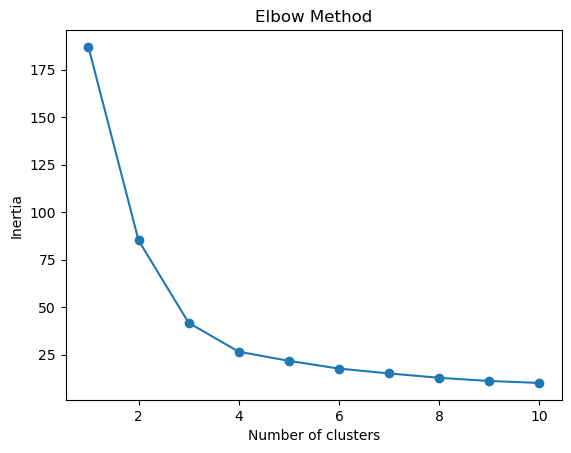

In [121]:
import warnings
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Ignore warnings
warnings.filterwarnings("ignore")

# Use the elbow method to find the optimal number of clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_normalized)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [127]:
# Initialize KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=42)

# Initialize centroids
kmeans.fit(df_normalized)

KMeans(n_clusters=3, random_state=42)

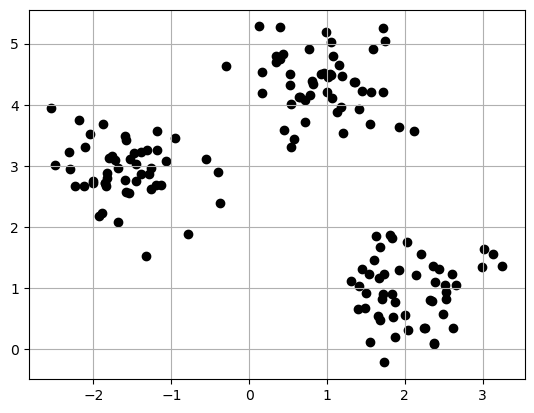

In [133]:
from sklearn.datasets import make_blobs
import numpy as np

# Generate synthesized data using "make_blobs" function
X, y = make_blobs(n_samples=150,
                  n_features=2,
                  centers=3,
                  cluster_std=0.5,
                  random_state=0)

# Visualize the data
plt.scatter(X[:, 0],
            X[:, 1],
            c='black',
            marker='o')
plt.grid()
plt.show()

In [130]:
# Fit the model
km = KMeans(n_clusters=3,  # how many clusters we expect
            n_init=10,  # how many initial runs
            random_state=0)

# Fit and predict
y_km = km.fit_predict(X)

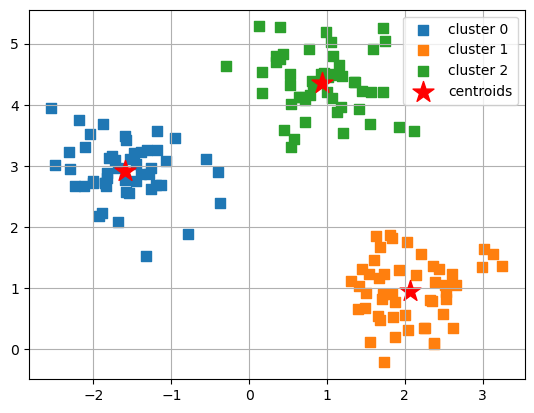

In [132]:
# Define a function to plot clusters
def plot_clusters(X, y_res, plt_cluster_centers=False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster, 0]
        y = X[y_res == cluster, 1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

# Plot clustering result
plot_clusters(X, y_km, plt_cluster_centers=True)

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

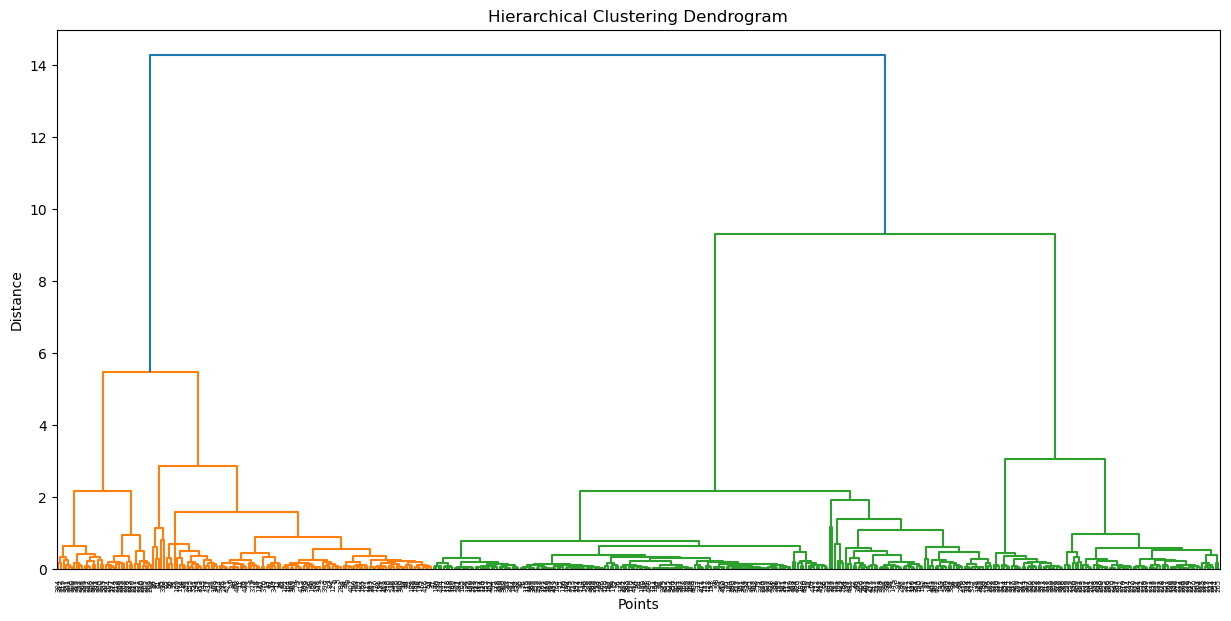

In [143]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import dendrogram, linkage

# Normalize the features 
scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(df)

# Calculate the proximity matrix using Ward's method
linkage_matrix = linkage(df_normalized, method='ward')

# Plot the dendrogram
plt.figure(figsize=(15, 7))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Points')
plt.ylabel('Distance')
plt.show()

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

Explained Variance Ratio: [0.54880788 0.3489064 ]


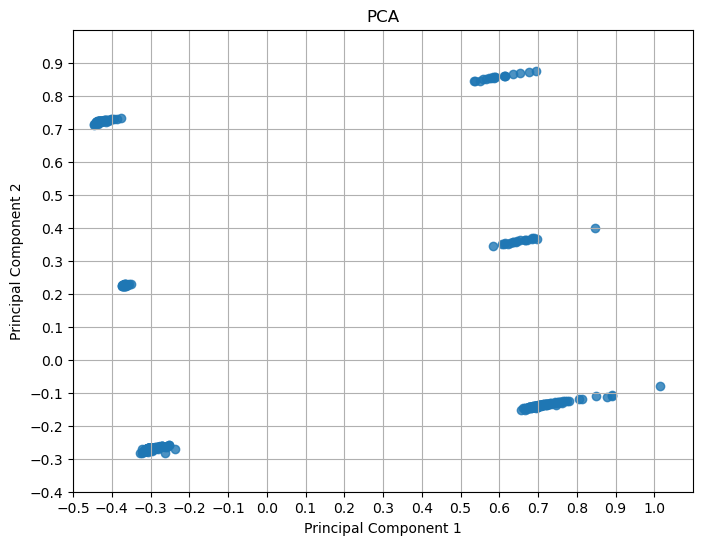

In [157]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Initialize PCA 
pca = PCA(n_components=2)

# Fit PCA on the normalized data
principal_components = pca.fit_transform(df_normalized)

# Visualize the explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Plotting the two principal components
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], alpha=0.8)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA')
plt.xlim(-0.5, 1.1)  
plt.ylim(-0.4, 1) 
plt.xticks(np.arange(-0.5, 1.1, 0.1))  
plt.yticks(np.arange(-0.4, 1, 0.1))

plt.grid(True)
plt.show()

In our model we have two principal compotents, and the explained variance ration array [0.54880788 0.3489064] means that:

- The first principal component explaints about 54.88% of the total variance in the data. 
- The second principal component explains about 34.89% of the total variance in the data. 

Together theses two exaplins for about 89.77% of the total variance in the data. 


# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

1. Through the use of Kmeans and Hierarchical Clustering, we identified three distinct customer segments based on their annual spending across different product categories. 
    a. These represent customers who exhibit moderate spending on all products, which might represent medium-sized establishments with a balanced product inventory. 
    b. Might represent customers with relatively lower spending across all categories. This could represent more budget-conscious customers who prioritizes essential items. 
    c. Customers in this cluster higher spending in different categories. This might represent larger business such as restaurants or supermarkets. 
    
2. There are significant correlations between certain pairs of features. Indicating potential patterns in customer purchasing behaviours, such as:
    a. Strong positive correlation between Grocery and Detergents_Paper spending. Meaning that people who spend more on groceries also tend to spend more on detergents and paper products. 
    b. Strong positive correlation between Grocery and Milk. Also meaning that people who spends a lot on groceries, tends to include milk. 
    c. Negative correlation between Fresh and Frozen. suggesting that customers who spend more on fresh product might spend less on frozen items. 
    
3. Key insights from PCA: The first principal component is heavily weighted by spending on Milk, Grocery and Detergent_Paper, implying that these are correlated and contribute significantly to customer variance. 

4. Based on our findings from clustering, we can suggest strategies like tailoring specific marketing strategies for each customer segmentation to boost sales in various product categories.